# Modelos

Luego de tener nuestros datos limpios exportados, procedemos a realizar estandarización y aplicar modelos para resolver el problema de clustering de clases sociales 

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura de datos

Luego de la limpieza, exportamos un archivo csv con los datos listos. Vamos a leerlo

In [50]:
df = pd.read_csv('data/data_clean.csv')
df.head()

,n_personas_hogar,lugar_vivienda,edad,cotiza_prestaciones,nivel_educativo,ocupacion,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,...,recibio_dinero_personas_residentes,recibio_dinero_personas_extranjeras,recibio_ayuda_institucional,recibio_pago_bancos,recibio_cesantias,tiene_edad_trabajar,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado
0,1,urbano,33,False,Media,Trabajando,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,768000.0
1,1,urbano,31,False,Media,Oficios del hogar,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,0.0
2,1,urbano,76,False,Ninguno,Oficios del hogar,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,0.0
3,1,urbano,58,True,Básica primaria,Trabajando,False,False,False,False,...,False,False,True,False,False,True,0.0,0.0,0.0,792500.0
4,1,urbano,61,True,Básica primaria,Oficios del hogar,False,False,False,False,...,False,False,False,False,False,True,0.0,0.0,0.0,50000.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186550 entries, 0 to 186549
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     186550 non-null  int64  
 1   lugar_vivienda                       186550 non-null  object 
 2   edad                                 186550 non-null  int64  
 3   cotiza_prestaciones                  186550 non-null  bool   
 4   nivel_educativo                      186550 non-null  object 
 5   ocupacion                            186550 non-null  object 
 6   recibio_alimentos_pago_trabajo       186550 non-null  bool   
 7   recibio_vivienda_pago_trabajo        186550 non-null  bool   
 8   recibio_transporte_empresa           186550 non-null  bool   
 9   recibio_pago_especie                 186550 non-null  bool   
 10  recibio_bonificaciones_anuales       186550 non-null  bool   
 11  horas_semana_

Como podemos ver, no tiene datos nulos y la mayoría de columnas son numéricas o booleana, vamos a convertir las que no.

In [52]:
df['lugar_vivienda'].unique()

array(['urbano', 'rural'], dtype=object)

In [53]:
df['is_urbano'] = df['lugar_vivienda'].map({'urbano': True, 'rural': False})

df.drop('lugar_vivienda', axis=1, inplace=True)

df.head()

,n_personas_hogar,edad,cotiza_prestaciones,nivel_educativo,ocupacion,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,recibio_bonificaciones_anuales,...,recibio_dinero_personas_extranjeras,recibio_ayuda_institucional,recibio_pago_bancos,recibio_cesantias,tiene_edad_trabajar,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado,is_urbano
0,1,33,False,Media,Trabajando,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,768000.0,True
1,1,31,False,Media,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,0.0,True
2,1,76,False,Ninguno,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,0.0,True
3,1,58,True,Básica primaria,Trabajando,False,False,False,False,False,...,False,True,False,False,True,0.0,0.0,0.0,792500.0,True
4,1,61,True,Básica primaria,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,50000.0,True


Mapeamos lugar_vivienda a una variable booleana y la llamamos is_urbano para claridad 

True = 'urbano',  False ='rural'

In [54]:
print(df['nivel_educativo'].unique())
print(df['ocupacion'].unique())

['Media' 'Ninguno' 'Básica primaria' 'Básica secundaria'
 'No sabe, no informa' 'Superior o universitaria' 'Preescolar']
['Trabajando' 'Oficios del hogar' 'Incapacitado permanente'
 'Otra actividad' 'Buscando trabajo' 'Estudiando']


In [55]:
df['nivel_educativo'] = df['nivel_educativo'].replace('No sabe, no informa', 'Ninguno')

Tomaremos el nivel_educativo de No sabe, no informa como Ninguno y organizamos el nivel educativo para tener un mayor peso a mayor nivel educativo

In [56]:
nivel_educativo_order = ['Ninguno', 'Preescolar', 'Básica primaria', 'Básica secundaria', 'Media', 'Superior o universitaria']

# Aplicar un CategoricalDtype para darle el orden a la columna
df['nivel_educativo'] = pd.Categorical(df['nivel_educativo'], categories=nivel_educativo_order, ordered=True)

# Convertir las categorías a números
df['nivel_educativo'] = df['nivel_educativo'].cat.codes

df.head()

,n_personas_hogar,edad,cotiza_prestaciones,nivel_educativo,ocupacion,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,recibio_bonificaciones_anuales,...,recibio_dinero_personas_extranjeras,recibio_ayuda_institucional,recibio_pago_bancos,recibio_cesantias,tiene_edad_trabajar,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado,is_urbano
0,1,33,False,4,Trabajando,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,768000.0,True
1,1,31,False,4,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,0.0,True
2,1,76,False,0,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,0.0,True
3,1,58,True,2,Trabajando,False,False,False,False,False,...,False,True,False,False,True,0.0,0.0,0.0,792500.0,True
4,1,61,True,2,Oficios del hogar,False,False,False,False,False,...,False,False,False,False,True,0.0,0.0,0.0,50000.0,True


Obtenemos los valores dummies de la columna de ocupación

In [57]:
df = pd.get_dummies(df, columns=['ocupacion'], drop_first=True)

df.head()

,n_personas_hogar,edad,cotiza_prestaciones,nivel_educativo,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,recibio_bonificaciones_anuales,horas_semana_trabajo,...,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado,is_urbano,ocupacion_Estudiando,ocupacion_Incapacitado permanente,ocupacion_Oficios del hogar,ocupacion_Otra actividad,ocupacion_Trabajando
0,1,33,False,4,False,False,False,False,False,72.000000,...,0.0,0.0,0.0,768000.0,True,False,False,False,False,True
1,1,31,False,4,False,False,False,False,False,44.925939,...,0.0,0.0,0.0,0.0,True,False,False,True,False,False
2,1,76,False,0,False,False,False,False,False,44.925939,...,0.0,0.0,0.0,0.0,True,False,False,True,False,False
3,1,58,True,2,False,False,False,False,False,40.000000,...,0.0,0.0,0.0,792500.0,True,False,False,False,False,True
4,1,61,True,2,False,False,False,False,False,14.000000,...,0.0,0.0,0.0,50000.0,True,False,False,True,False,False


## Escalamiento

Para los modelos a usar no es necesario encodear o escalar los valores booleanos, pero si vamos a escalar los numéricos para que tengan igual peso

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['n_personas_hogar', 'edad', 'horas_semana_trabajo', 
                'ingreso_dividendos', 'ingreso_ayudas_hogares', 'nivel_educativo']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [59]:
df.head()

,n_personas_hogar,edad,cotiza_prestaciones,nivel_educativo,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,recibio_transporte_empresa,recibio_pago_especie,recibio_bonificaciones_anuales,horas_semana_trabajo,...,ingreso_dividendos,ingreso_ayudas_hogares,ingreso_arriendos,ingreso_total_observado,is_urbano,ocupacion_Estudiando,ocupacion_Incapacitado permanente,ocupacion_Oficios del hogar,ocupacion_Otra actividad,ocupacion_Trabajando
0,-0.094055,-0.485648,False,0.668407,False,False,False,False,False,2.709272,...,-0.009193,-0.151868,0.0,768000.0,True,False,False,False,False,True
1,-0.094055,-0.594655,False,0.668407,False,False,False,False,False,0.000000,...,-0.009193,-0.151868,0.0,0.0,True,False,False,True,False,False
2,-0.094055,1.857985,False,-2.632181,False,False,False,False,False,0.000000,...,-0.009193,-0.151868,0.0,0.0,True,False,False,True,False,False
3,-0.094055,0.876929,True,-0.981887,False,False,False,False,False,-0.492933,...,-0.009193,-0.151868,0.0,792500.0,True,False,False,False,False,True
4,-0.094055,1.040438,True,-0.981887,False,False,False,False,False,-3.094725,...,-0.009193,-0.151868,0.0,50000.0,True,False,False,True,False,False


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186550 entries, 0 to 186549
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     186550 non-null  float64
 1   edad                                 186550 non-null  float64
 2   cotiza_prestaciones                  186550 non-null  bool   
 3   nivel_educativo                      186550 non-null  float64
 4   recibio_alimentos_pago_trabajo       186550 non-null  bool   
 5   recibio_vivienda_pago_trabajo        186550 non-null  bool   
 6   recibio_transporte_empresa           186550 non-null  bool   
 7   recibio_pago_especie                 186550 non-null  bool   
 8   recibio_bonificaciones_anuales       186550 non-null  bool   
 9   horas_semana_trabajo                 186550 non-null  float64
 10  recibio_pagos_arriendos              186550 non-null  bool   
 11  recibio_pagos

Ahora estamos listos para aplicar modelos a los datos escalados

Vamos a registrar y versionar nuestros modelos usando MLflow. Para esto iniciamos definiendo la IRU de tracking de los modelos

In [61]:
import mlflow
mlflow.set_tracking_uri("http://localhost:5000")

## KNN sin PCA

Se inicia con n_clusters igual a 4 porque son los identificados por el DANE:
    
- Pobreza
- Vulnerable
- Clase media
- Clase alta

Sabemos que al tener tantas variables es mejor usar PCA para reducir la dimensionalidad. Pero para dar un primer acercamiento lo haremos sin PCA.

2024/11/05 14:18:19 INFO mlflow.tracking.fluent: Experiment with name 'Experiment K-Means Clusters (sin PCA)' does not exist. Creating a new experiment.


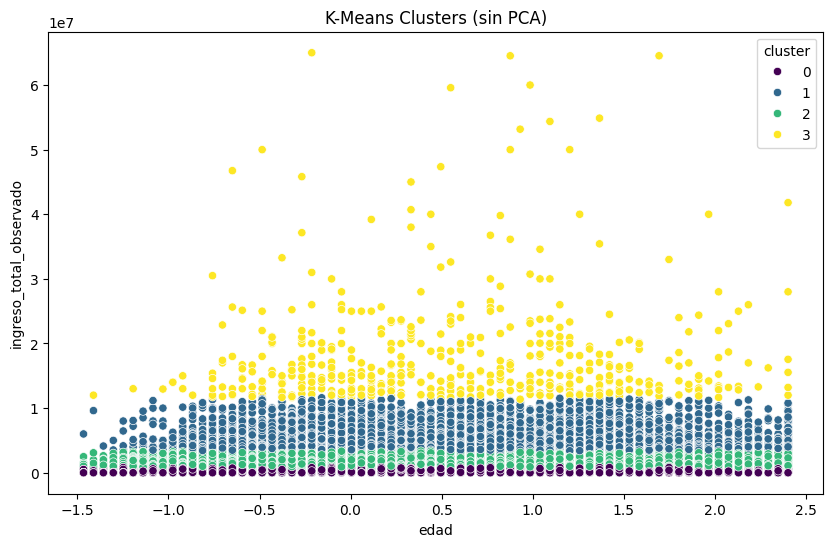

2024/11/05 14:18:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 14:18:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run K-Means sin PCA_20241105_141819 at: http://localhost:5000/#/experiments/829643815946360771/runs/5f15983579004ba2afcef747817224eb.
2024/11/05 14:18:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/829643815946360771.


In [72]:
from sklearn.cluster import KMeans
import datetime

# Asignar nombre al experimento en MLFLOW
mlflow.set_experiment("Experiment K-Means Clusters (sin PCA)")
# Asignar nombre al runjob de MLFLOW
run_name = f"K-Means sin PCA_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Definir el número de clusters
num_clusters = 4

# Iniciar experimento en MLflow
with mlflow.start_run(run_name=run_name):


    # Aplicar K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=10101, n_init=10)
    kmeans.fit_predict(df)

    df['cluster'] = kmeans.labels_

    # Visualizar los clusters formados
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='edad', y='ingreso_total_observado', hue='cluster', data=df, palette='viridis')
    plt.title('K-Means Clusters (sin PCA)')
    plt.show()
    
    # Registrar parámetros, métricas y modelo en MLflow
    mlflow.log_param("num_clusters", num_clusters)
    mlflow.log_param("init", kmeans.init)
    mlflow.sklearn.log_model(kmeans, "K-Means Clusters (sin PCA)")
    
    # Registrar metricas en MLflow
    inertia = kmeans.inertia_
    mlflow.log_metric("inertia", inertia)


Se observa que queriendo formar 4 clusters como lo hace el DANE, si contrastamos edad con ingresos vemos que no tiene alguna relación y que se pueden observar que la mayoria de grupos se forman por debajo de 1'200.000 pesos. Por lo tanto, este modelo sugiere que todas las personas que ganen más de ese valor pertenecen al mismo grupo. No estamos satisfechos con esta conclusión y procedemos a realizar PCA, realizar de nuevo KNN y probar otros modelos.

## PCA

Con el objetivo de reducir la dimensionalidad y descubrir cuánto explica de la varianza cada variable se realiza un análisis de PCA

In [73]:
from sklearn.decomposition import PCA

df_standardized = df.copy()

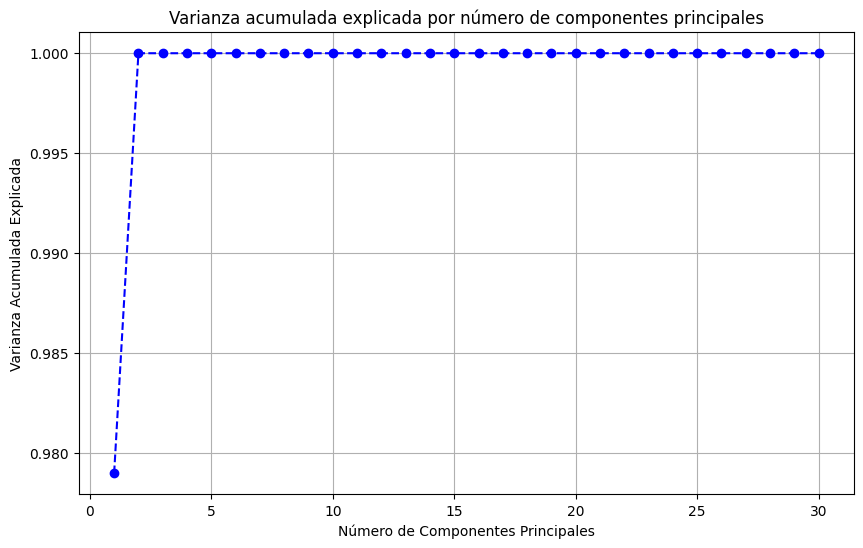

In [74]:
# Calculo PCA y grafica de varianza acumulada  explicada
pca = PCA(random_state=123)
X_pca = pca.fit_transform(df_standardized)

explained_variance = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance)

# Crear el gráfico de sedimentación
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumsum, marker='o', linestyle='--', color='b')
plt.title('Varianza acumulada explicada por número de componentes principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.show()

In [75]:
pca = PCA(n_components=0.98, random_state=123)
X_pca = pca.fit_transform(df_standardized)
print("Cantidad de componentes que explican el 98% de la varianza:  " + str(X_pca.shape[1]))

Cantidad de componentes que explican el 98% de la varianza:  2


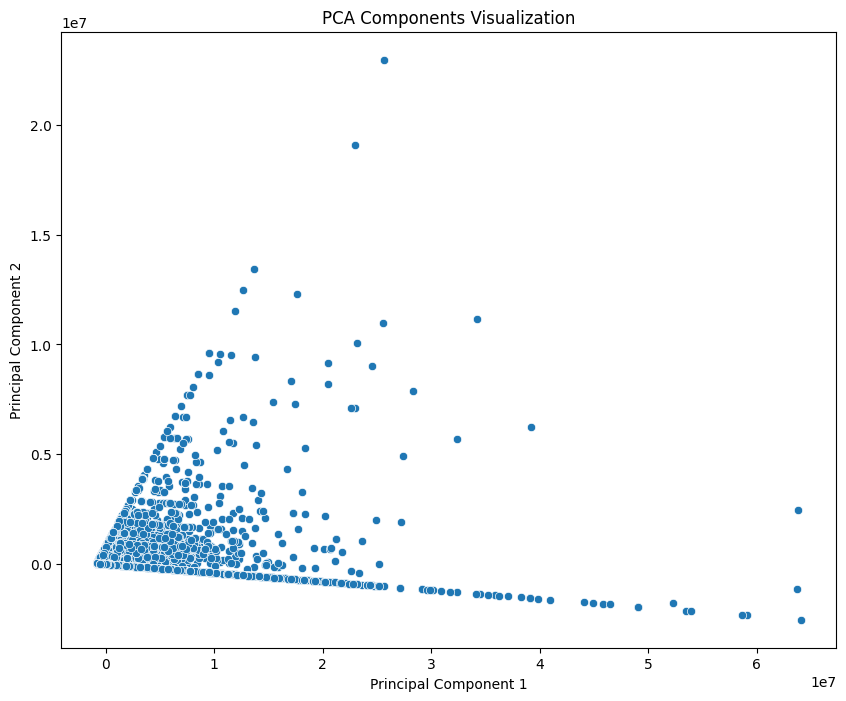

In [76]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title('PCA Components Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

A una primera vista, se sabe que con dos componentes se explica el 98% de la varianza. Con una primera visualización no es posible identificar a qué podría referirse cada componente o si existe una relación entre ellas. Se procede a realizar un análisis más profundo

In [77]:
X_pca

array([[-9.21299635e+04, -1.89196094e+04],
       [-8.59530711e+05,  1.14134329e+04],
       [-8.59530711e+05,  1.14134329e+04],
       ...,
       [ 1.83336644e+06, -9.50286883e+04],
       [-5.59764794e+05, -4.35411742e+02],
       [-5.68091625e+05, -1.06277168e+02]])

### Explicando PCA

In [78]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

In [ ]:
# Agrupar por cluster y calcular estadísticas descriptivas
cluster_characteristics = df_pca.groupby('cluster')[['PC1', 'PC2']].agg(['mean', 'median', 'std', 'count'])
cluster_characteristics

In [81]:
cargas = pd.DataFrame(pca.components_, columns=df.columns, index=['Componente 1', 'Componente 2'])
print(cargas)

              n_personas_hogar          edad  cotiza_prestaciones  \
Componente 1     -1.048153e-08  8.367317e-08         9.831742e-09   
Componente 2     -1.222562e-08  2.570259e-07        -4.375505e-10   

              nivel_educativo  recibio_alimentos_pago_trabajo  \
Componente 1     8.206738e-08                    2.389718e-09   
Componente 2    -9.213720e-08                   -1.092380e-08   

              recibio_vivienda_pago_trabajo  recibio_transporte_empresa  \
Componente 1                   1.768808e-09                3.520706e-09   
Componente 2                  -6.047332e-09               -6.594733e-09   

              recibio_pago_especie  recibio_bonificaciones_anuales  \
Componente 1          7.862889e-10                    3.478152e-10   
Componente 2         -1.291860e-09                    3.256184e-10   

              horas_semana_trabajo  ...  ingreso_ayudas_hogares  \
Componente 1          5.876429e-08  ...            4.352581e-08   
Componente 2         -1.3

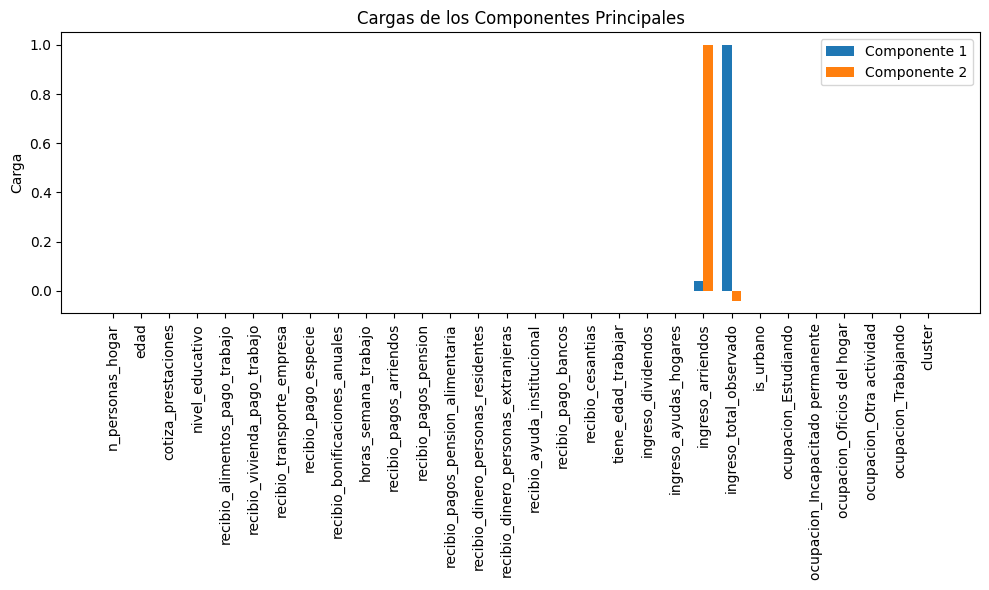

In [82]:
# Definir la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Variables originales (columnas)
variables = df.columns

# Dibujar las cargas de los dos componentes
x = np.arange(len(variables))
width = 0.35  # El ancho de las barras

# Barras para el Componente 1
ax.bar(x - width/2, cargas.loc['Componente 1'], width, label='Componente 1')

# Barras para el Componente 2
ax.bar(x + width/2, cargas.loc['Componente 2'], width, label='Componente 2')

# Etiquetas y título
ax.set_ylabel('Carga')
ax.set_title('Cargas de los Componentes Principales')
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=90)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

De manera sorpresiva vemos que las únicas dos variables escogidas son el ingreso_total_observado y el ingreso_arriendos. 

De esta forma, la primera componente parece corresponder casi que únicamente a ingreso total y la segunda al ingreso de arriendos

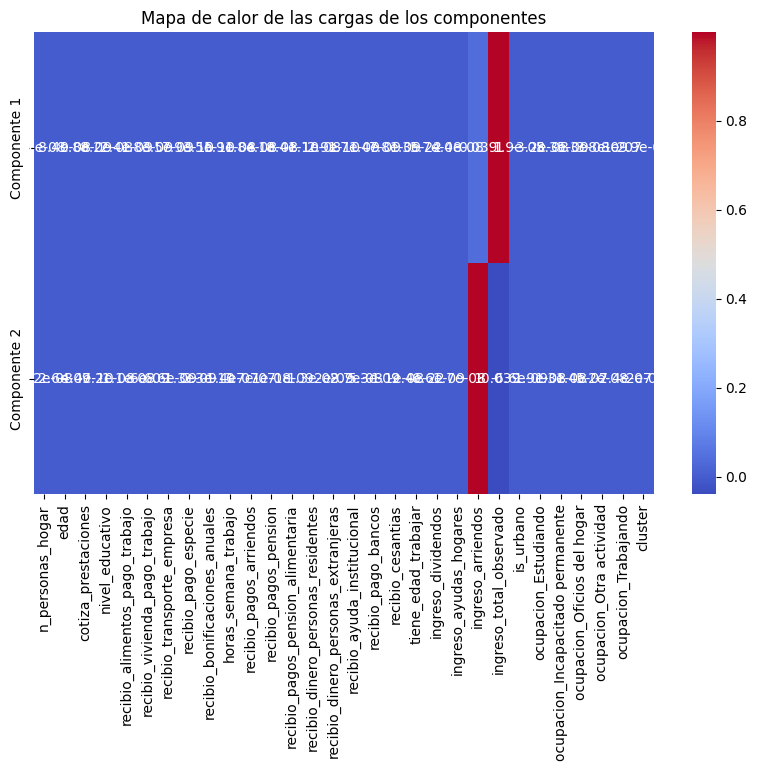

In [83]:
pca_components = pd.DataFrame(pca.components_, columns=df.columns, index=[f'Componente {i+1}' for i in range(pca.n_components_)])

plt.figure(figsize=(10,6))
sns.heatmap(pca_components, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de las cargas de los componentes')
plt.show()

Decidimos realizar un mapa de color para ver si hay alguna relación que no logramos percibir, pero sigue siendo evidente que las demás variables no tienen ninguna relación ni entre ellas ni con las componentes.

Partiendo de estas dos componentes, vamos a realizar un análisis aplicando de nuevo KNN y luego diversos modelos

## Aplicando KNN con PCA

2024/11/05 14:18:53 INFO mlflow.tracking.fluent: Experiment with name 'Experiment K-Means Clusters (con PCA)' does not exist. Creating a new experiment.


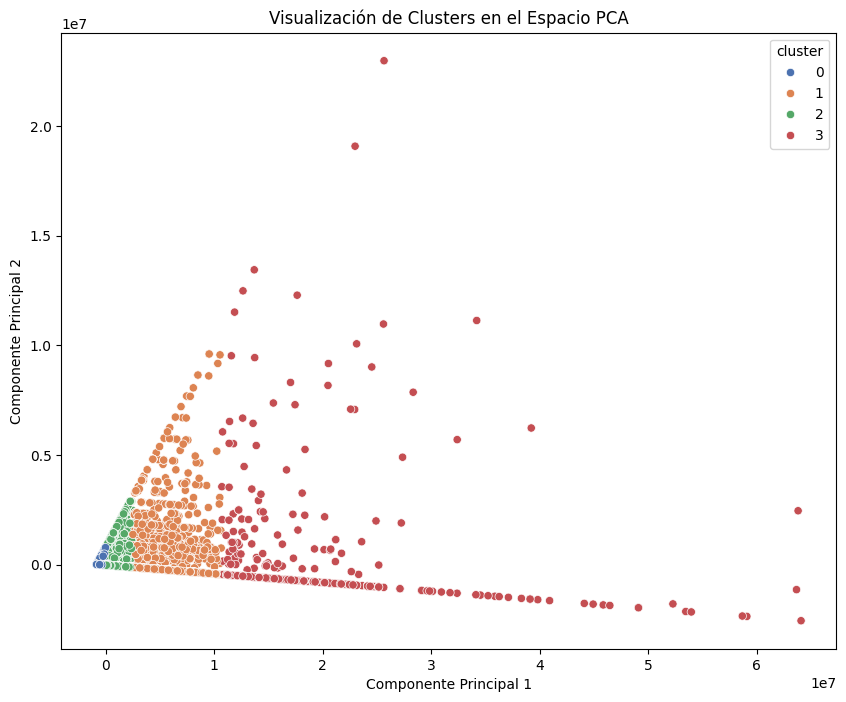

2024/11/05 14:18:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 14:18:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run K-Means con PCA_20241105_141853 at: http://localhost:5000/#/experiments/761551753154616532/runs/c7467bba04e249799c0406194551387d.
2024/11/05 14:18:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/761551753154616532.


In [84]:
num_clusters = 4

# Asignar nombre al experimento en MLFLOW
mlflow.set_experiment("Experiment K-Means Clusters (con PCA)")
# Asignar nombre al runjob de MLFLOW
run_name = f"K-Means con PCA_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Iniciar experimento en MLflow
with mlflow.start_run(run_name=run_name):
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=10101, n_init=10)
    kmeans.fit_predict(df_pca)

    df_pca['cluster'] = kmeans.labels_

    # Visualizar los clusters formados
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='deep')
    plt.title('Visualización de Clusters en el Espacio PCA')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.show()
    
    # Registrar parámetros, métricas y modelo en MLflow
    mlflow.log_param("num_clusters", num_clusters)
    mlflow.log_param("init", kmeans.init)
    mlflow.sklearn.log_model(kmeans, "K-Means Clusters (sin PCA)")
    
    # Registrar metricas en MLflow
    inertia = kmeans.inertia_
    mlflow.log_metric("inertia", inertia)

Queriendo separlos de nuevo en 4 clusters, parece que se sigue teniendo el mismo agrupamiento: tres clases agrupada por debajo del 1'200.000.

Por lo tanto se sugiere utilizar el método del codo para hallar el número óptimo de clusters a utilizar

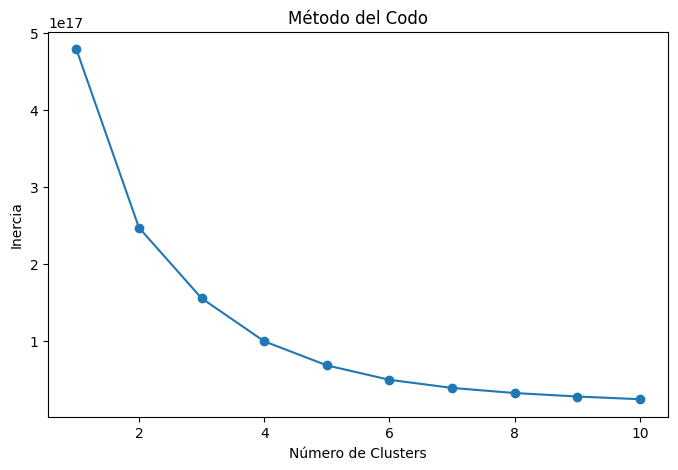

In [85]:
inertia = []
num_clusters_range = range(1, 11)  # Probar con 1 a 10 clusters

for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=10101, n_init=10)
    kmeans.fit(df_pca[['PC1', 'PC2']])
    inertia.append(kmeans.inertia_)

# Graficar el resultado
plt.figure(figsize=(8, 5))
plt.plot(num_clusters_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

Podemos decir que el número óptimo de clusters se encuentra entre 5 y 7

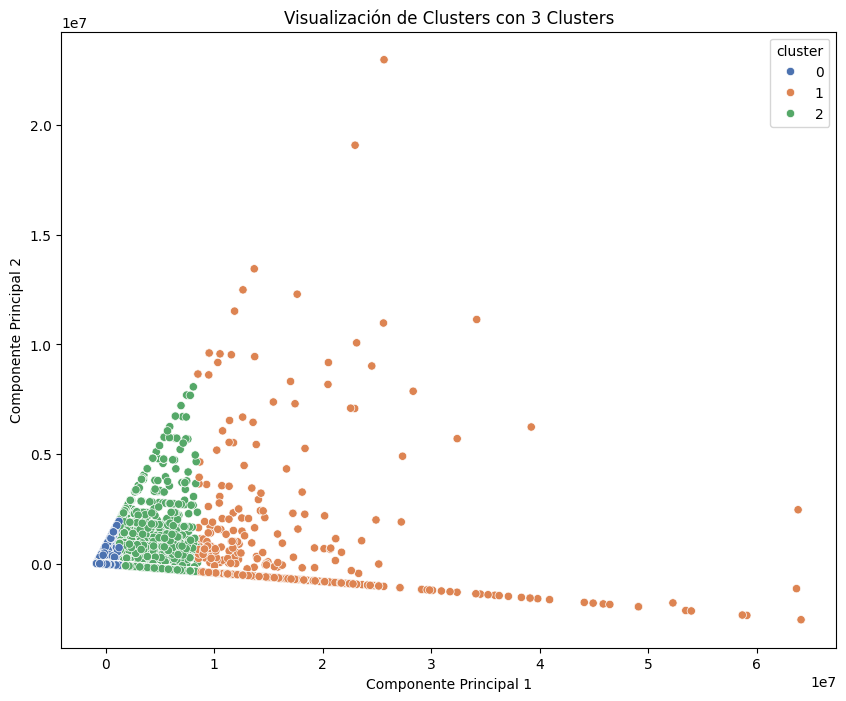

2024/11/05 14:19:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 14:19:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run K-Means con PCA_20241105_141910 at: http://localhost:5000/#/experiments/761551753154616532/runs/b706b1601e2a4bd9b7c8d5bcd7eed053.
2024/11/05 14:19:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/761551753154616532.


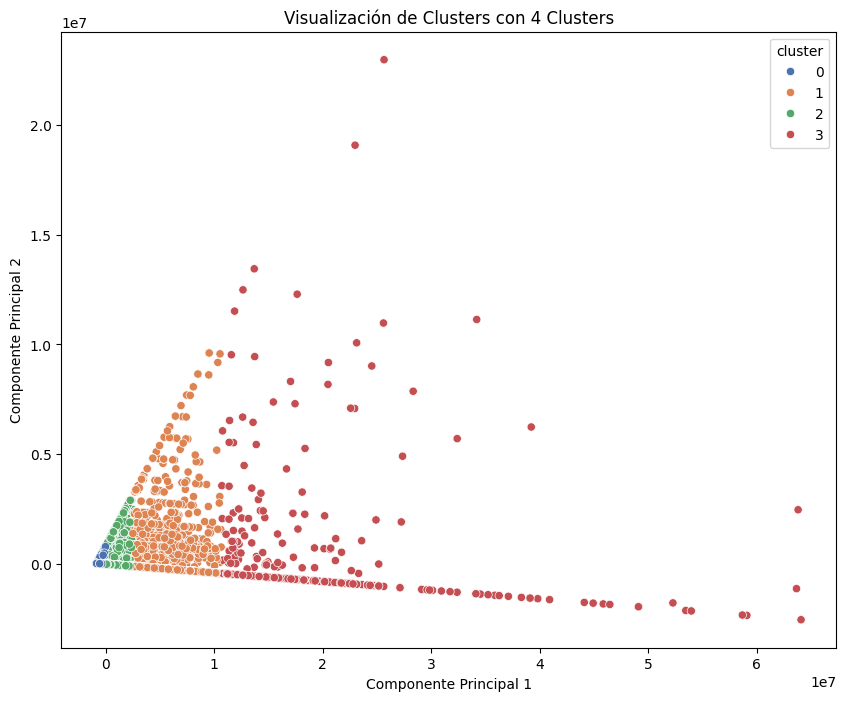

2024/11/05 14:19:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 14:19:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run K-Means con PCA_20241105_141915 at: http://localhost:5000/#/experiments/761551753154616532/runs/247ec284f1144963906a52183eb44aff.
2024/11/05 14:19:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/761551753154616532.


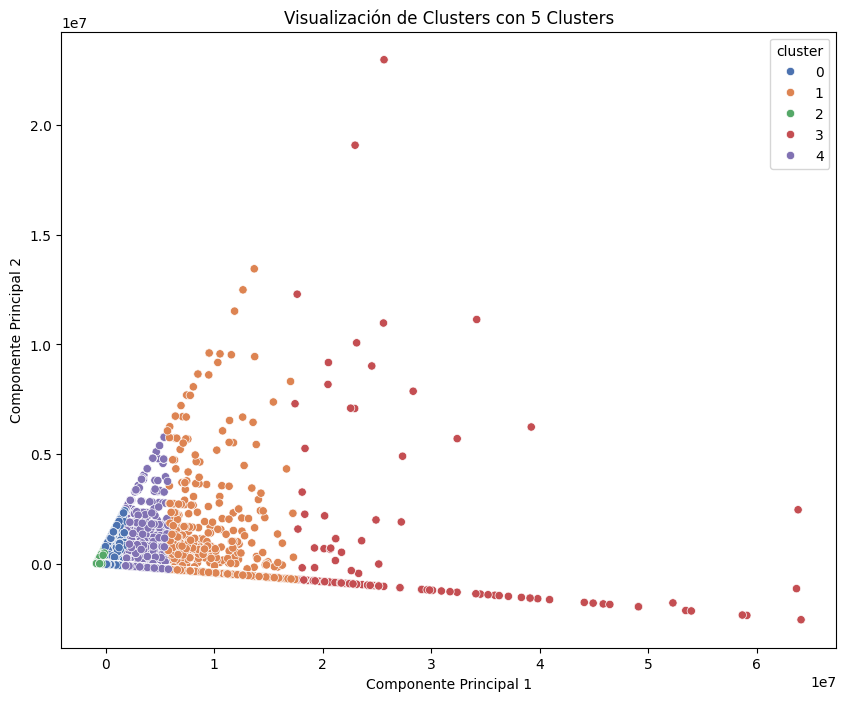

2024/11/05 14:19:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 14:19:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run K-Means con PCA_20241105_141920 at: http://localhost:5000/#/experiments/761551753154616532/runs/3e3b18ecf9e0447eaf32fd85c62eba62.
2024/11/05 14:19:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/761551753154616532.


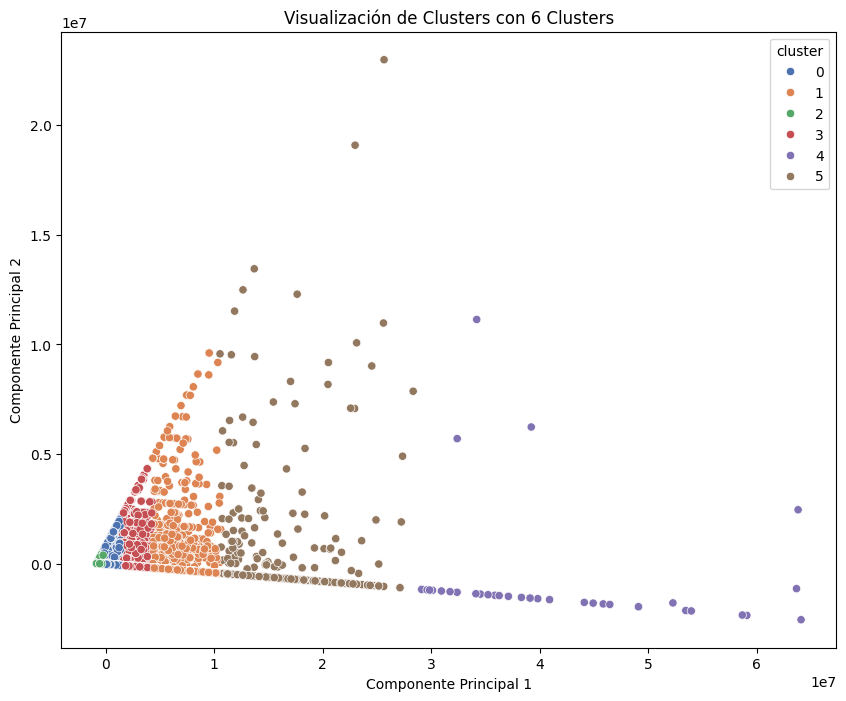

2024/11/05 14:19:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 14:19:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run K-Means con PCA_20241105_141925 at: http://localhost:5000/#/experiments/761551753154616532/runs/2c0e690cd06f4b7490906d8d55ea6c7f.
2024/11/05 14:19:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/761551753154616532.


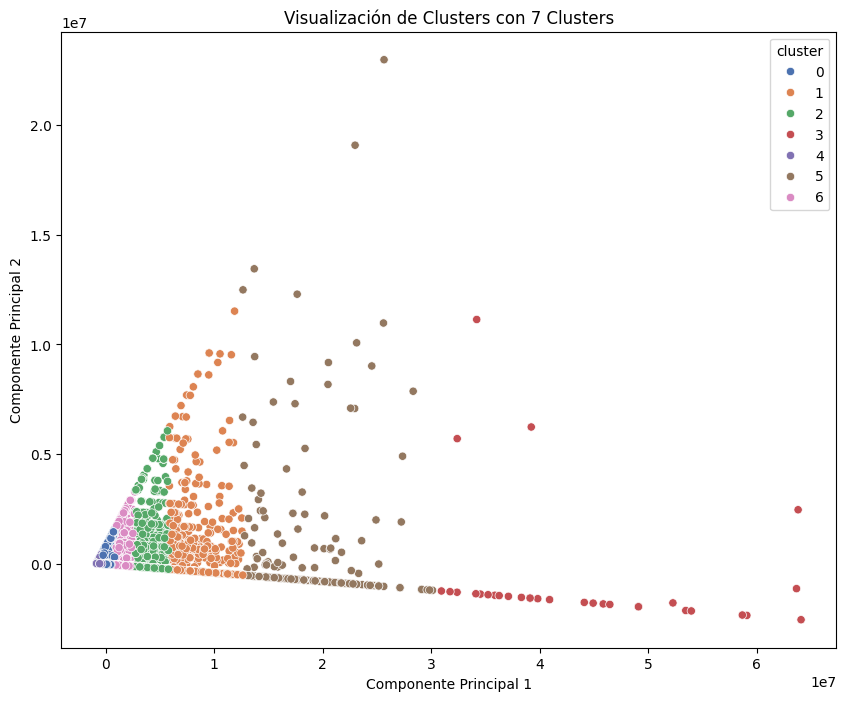

2024/11/05 14:19:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 14:19:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run K-Means con PCA_20241105_141930 at: http://localhost:5000/#/experiments/761551753154616532/runs/7e55010dff0940a59fedbc2fb8519f8c.
2024/11/05 14:19:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/761551753154616532.


In [86]:
def plot_clusters(n_clusters):
    # Asignar nombre al experimento en MLFLOW
    mlflow.set_experiment("Experiment K-Means Clusters (con PCA)")
    # Asignar nombre al runjob de MLFLOW
    run_name = f"K-Means con PCA_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"
    
    # Iniciar experimento en MLflow
    with mlflow.start_run(run_name=run_name):

        kmeans = KMeans(n_clusters=n_clusters, random_state=10101, n_init=10)
        df_pca['cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='deep')
        plt.title(f'Visualización de Clusters con {n_clusters} Clusters')
        plt.xlabel('Componente Principal 1')
        plt.ylabel('Componente Principal 2')
        plt.show()
        
        # Registrar parámetros, métricas y modelo en MLflow
        mlflow.log_param("num_clusters", n_clusters)
        mlflow.log_param("init", kmeans.init)
        mlflow.sklearn.log_model(kmeans, "K-Means Clusters (sin PCA)")
        
        # Registrar metricas en MLflow
        inertia = kmeans.inertia_
        mlflow.log_metric("inertia", inertia)

# Probar con diferentes números de clusters
for n in [3, 4, 5, 6, 7]:
    plot_clusters(n)

Parece que la distribución de 6 clusters tiene un buen balance entre diferenciar las clases por debajo de la clase media y capturar la información de los datos atípicos.

## DBSCAN

Con el objetivo de observar cómo se comportan los clusters con un método que no capture tanto ruido como lo son los datos atípicos que observamos en los ingresos, vamos a utilizar DBSCAN

In [87]:
from sklearn.cluster import DBSCAN

# Asignar nombre al experimento en MLFLOW
mlflow.set_experiment("Experiment DBSCAN")
# Asignar nombre al runjob de MLFLOW
run_name = f"DBSCAN_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Iniciar experimento en MLflow
with mlflow.start_run(run_name=run_name):
    # Aplicar DBSCAN
    eps=0.5
    min_samples=5
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)  # Ajusta 'eps' y 'min_samples' según sea necesario
    df_pca['dbscan_cluster'] = dbscan.fit_predict(df_pca)

    # Ver cuántos clusters se han formado
    num_clusters = len(set(df_pca['dbscan_cluster'])) - (1 if -1 in df_pca['dbscan_cluster'].values else 0)
    print(f"Número de clusters formados: {num_clusters}")
    
    # Registrar parámetros en MLflow
    mlflow.log_param("eps", eps)
    mlflow.log_param("min_samples", min_samples)
    mlflow.log_param("num_clusters", num_clusters)


2024/11/05 14:19:35 INFO mlflow.tracking.fluent: Experiment with name 'Experiment DBSCAN' does not exist. Creating a new experiment.
2024/11/05 14:23:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run DBSCAN_20241105_141935 at: http://localhost:5000/#/experiments/449246892461244212/runs/c879b4921b86425e9b8be02925d55b52.
2024/11/05 14:23:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/449246892461244212.


Número de clusters formados: 2094


Comenzamos encontrando el número óptimo de eps y min_samples

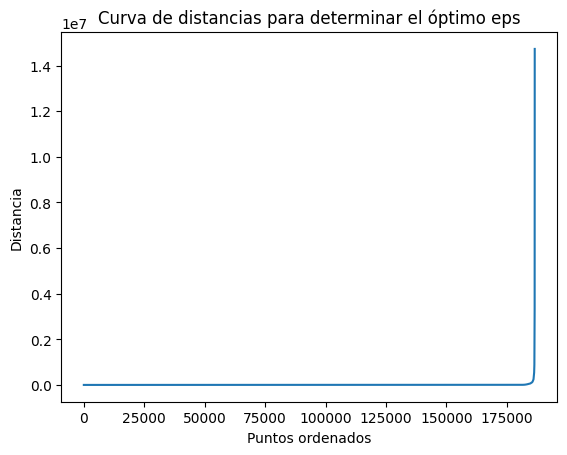

In [88]:
from sklearn.neighbors import NearestNeighbors

# Determinar el número de dimensiones (D) del DataFrame
D = df_pca.shape[1]

# Calcular min_samples usando la regla 2 * D
min_samples = 2 * D

# Encontrar el valor óptimo de eps usando la distancia al k-ésimo vecino
# Para eps, usamos el valor de 'min_samples' para definir 'k'
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

# Ordenar las distancias para encontrar el punto óptimo (codo en la curva de distancias)
distances = np.sort(distances[:, min_samples - 1], axis=0)

# Graficar la curva de distancias para visualizar el "codo"
plt.plot(distances)
plt.ylabel('Distancia')
plt.xlabel('Puntos ordenados')
plt.title('Curva de distancias para determinar el óptimo eps')
plt.show()

In [89]:
#pip install kneed

In [90]:
from kneed import KneeLocator

knee = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
optimal_eps = distances[knee.knee]

print(f"Valor óptimo de eps: {optimal_eps}")
print(f"Valor de min_samples: {min_samples}")

Valor óptimo de eps: 4365231.999999886
Valor de min_samples: 8


In [91]:
# Tomar una muestra aleatoria del 30% de los datos
df_sample = df_pca.sample(frac=0.3, random_state=42)

# Asignar nombre al experimento en MLFLOW
mlflow.set_experiment("Experiment DBSCAN")
# Asignar nombre al runjob de MLFLOW
run_name = f"DBSCAN_30% datos_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Iniciar experimento en MLflow
with mlflow.start_run(run_name=run_name):
    
    # Aplicar DBSCAN a la muestra
    dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
    df_sample['dbscan_cluster'] = dbscan.fit_predict(df_sample)
    
    # Ver cuántos clusters se han formado (excluyendo ruido, etiquetado como -1)
    num_clusters = len(set(df_pca['dbscan_cluster'].unique())) - (1 if -1 in df_pca['dbscan_cluster'].unique() else 0)
    print(f"Número de clusters formados: {num_clusters}")
    
    # Registrar parámetros en MLflow
    mlflow.log_param("eps", optimal_eps)
    mlflow.log_param("min_samples", min_samples)
    mlflow.log_param("num_clusters", num_clusters)

2024/11/05 14:25:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run DBSCAN_30% datos_20241105_142303 at: http://localhost:5000/#/experiments/449246892461244212/runs/92b379d82e9d40e38046a8b379868f0c.
2024/11/05 14:25:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/449246892461244212.


Número de clusters formados: 2094


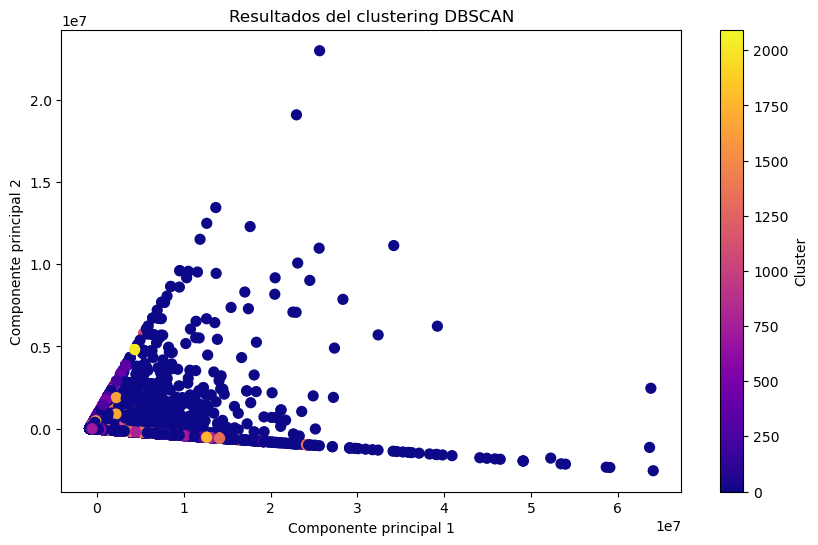

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar los puntos y colorear según el cluster asignado por DBSCAN
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['dbscan_cluster'], cmap='plasma', s=50)

# Título y etiquetas
plt.title('Resultados del clustering DBSCAN')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')

# Mostrar la gráfica
plt.colorbar(label='Cluster')
plt.show()

En primer lugar se utilizó DBSCAN ajustando los parámetros eps y min_samples de forma inicial, y se aplicó el clustering a los datos reducidos dimensionalmente en PCA. A continuación, se intentó optimizar el valor de eps graficando la distancia al k-ésimo vecino más cercano, lo que reveló un aumento significativo (codo en la curva) en los puntos finales, indicando el valor adecuado de eps. Para esto se usó la técnica del "KneeLocator" para determinar el valor óptimo de eps, resultando en 4365231.99.

Posteriormente, se aplicó DBSCAN con los valores óptimos a una muestra del 30% de los datos por problemas de capacidad de memoria. El valor de min_samples se calculó usando la regla 2 * D, donde D es el número de dimensiones del DataFrame. Al aplicar el clustering, se formaron 2094 clusters, lo que muestra una alta granularidad en los datos al usar este valor optimizado de eps.

Podemos concluir que DBSCAN no fue adecuado para organizar las personas en estratos sociales debido a la granularidad de los clusters formados

## Random Forest para Reducción de la Dimensionalidad

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Asignar nombre al experimento en MLFLOW
mlflow.set_experiment("Experiment RandomForest")
# Asignar nombre al runjob de MLFLOW
run_name = f"RandomForest_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Iniciar experimento en MLflow
with mlflow.start_run(run_name=run_name):
    
    # Separar las características (X) del target (cluster actual)
    X = df.drop(columns=['cluster'])
    y = df['cluster']

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Aplicar Random Forest para encontrar las características más importantes
    n_estimators=100
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Extraer la importancia de las características
    feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
    feature_importances = feature_importances.sort_values(by='importance', ascending=False)

    # Mostrar las características más importantes
    feature_importances.head(10)
    
    # Registrar parámetros en MLflow
    mlflow.log_param("n_estimators", n_estimators)
    default_params = rf.get_params()
    for param, value in default_params.items():
        mlflow.log_param(param, value)



2024/11/05 14:06:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_20241105_140653 at: http://localhost:5000/#/experiments/850379685613893539/runs/ab46374f2bba4512b9e94e0a7882cc9f.
2024/11/05 14:06:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/850379685613893539.


El modelo de Random Forest ha identificado las siguientes características como las más importantes para el agrupamiento socioeconómico:

* Ingreso total observado (0.764) - Esta característica es, con diferencia, la más importante.
* Horas de trabajo por semana (0.083).
* Ocupación: Trabajando (0.045).
* Recibió pagos de pensión (0.043).
* Edad (0.014).

Estas cinco características principales capturan la mayor parte de la variabilidad en los datos.

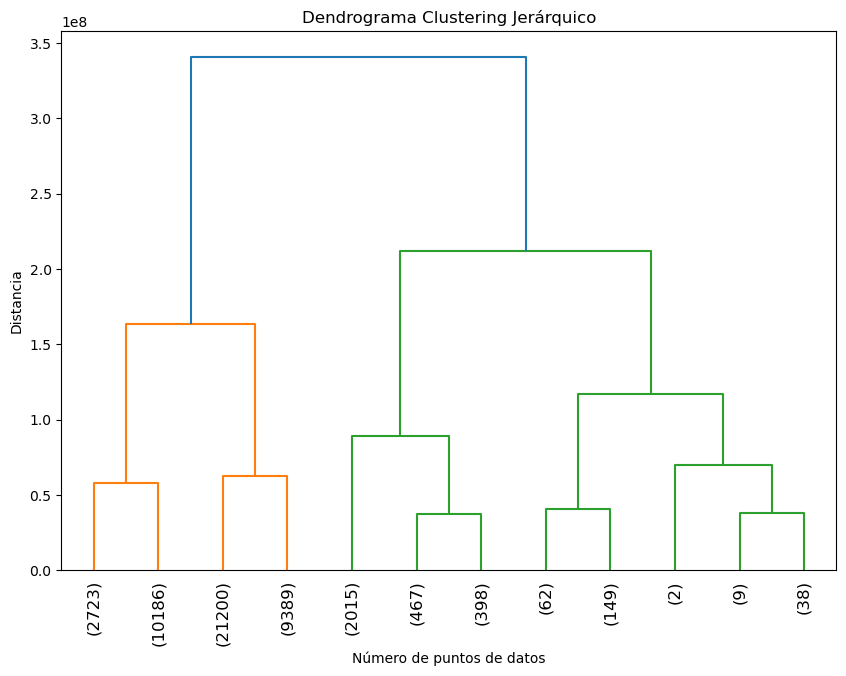

In [50]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Crear una muestra aleatoria del 25% de los datos
df_subset = df.sample(frac=0.25, random_state=19)

# Tomar las características más importantes
X_selected = df_subset[['ingreso_total_observado', 'horas_semana_trabajo', 'ocupacion_Trabajando', 'recibio_pagos_pension', 'edad']]

# Aplicar linkage para visualizar el dendrograma y observar cómo se forma el clustering
linked = linkage(X_selected, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12.)
plt.title('Dendrograma Clustering Jerárquico')
plt.xlabel('Número de puntos de datos')
plt.ylabel('Distancia')
plt.show()

In [52]:
# Aplicar clustering jerárquico aglomerativo para obtener 4 clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df_subset['hierarchical_cluster'] = hierarchical_clustering.fit_predict(X_selected)

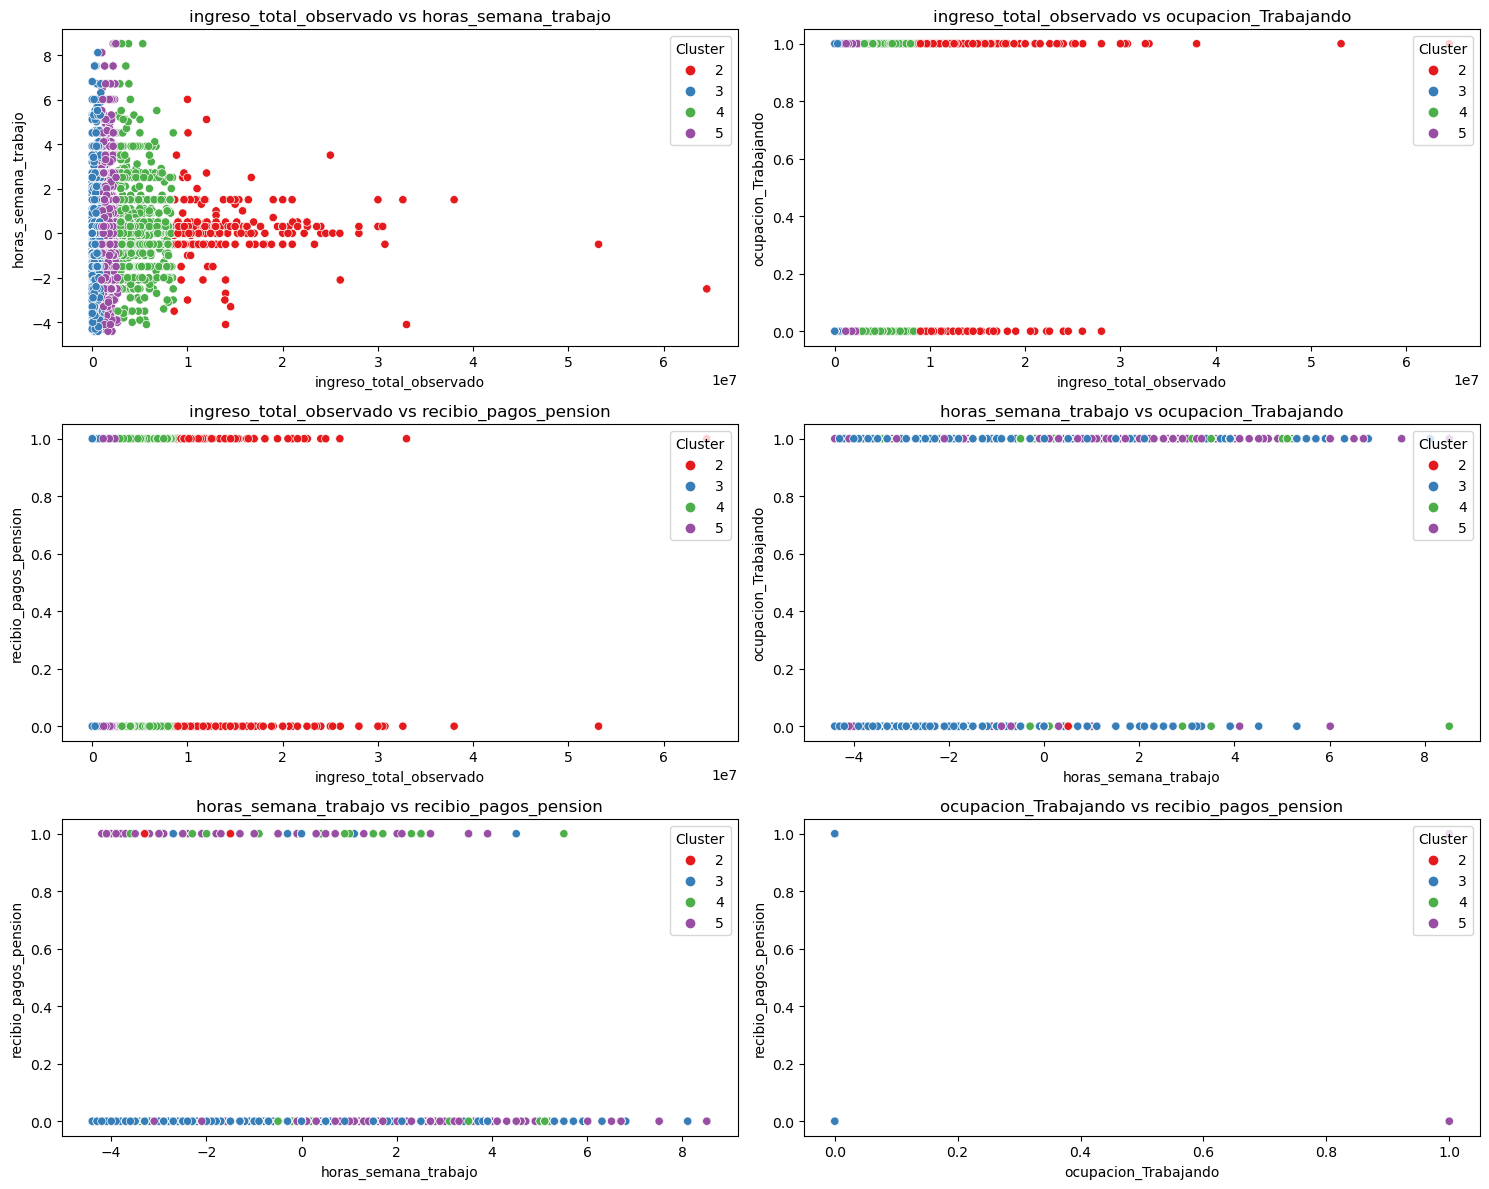

In [54]:
from itertools import combinations

# Convertir los clusters a un rango discreto de 1 a 4
df_subset['hierarchical_cluster'] = df_subset['hierarchical_cluster'] + 1  # Ajustar a rango 1-4

# Lista de las características más importantes
features = ['ingreso_total_observado', 'horas_semana_trabajo', 'ocupacion_Trabajando', 'recibio_pagos_pension']

# Generar todas las combinaciones posibles de pares de variables
combinations_list = list(combinations(features, 2))

# Crear subplots
fig, axes = plt.subplots(len(combinations_list)//2, 2, figsize=(15, 12))

# Añadir cada combinación de variables como un subplot
for (feature_x, feature_y), ax in zip(combinations_list, axes.flatten()):
    sns.scatterplot(x=feature_x, y=feature_y, hue='hierarchical_cluster', palette='Set1', data=df_subset, ax=ax)
    ax.set_title(f'{feature_x} vs {feature_y}')
    ax.legend(title='Cluster', loc='upper right')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

A pesar de que con Random Forest parece que se le da importancia a otras variables fuera del ingreso, los resultados siguen estando fuertemente influidos por esta variable. Sin importar las horas de trabajo, si se encuentra trabajando o si cotiza pensión. 

Entonces se decide quedarse con el resultado del método KNN utilizando PCA con 6 clusters.

## Conclusión

- Colombia es un país con una desigualdad enorme que hace infactible clasificar a las personas en 4 clases sociales, como propone el DANE. Cuando realizamos esta clasificación, se puede entender por qué se toma un valor tan bajo para clasificar a una persona como estrato alto, cuando hay una gran cantidad de personas que no lo son.
- Las clases sociales en Colombia están casi que únicamente dadas por los ingresos en el hogar
- Ni la edad, horas de trabajo o nivel educativo parecen influir fielmente en una mejora de ingresos y por lo tanto una mejor clase social

Procedemos a realizar un gráfico final con KNN y sus 6 clases sociales para poder describirlas

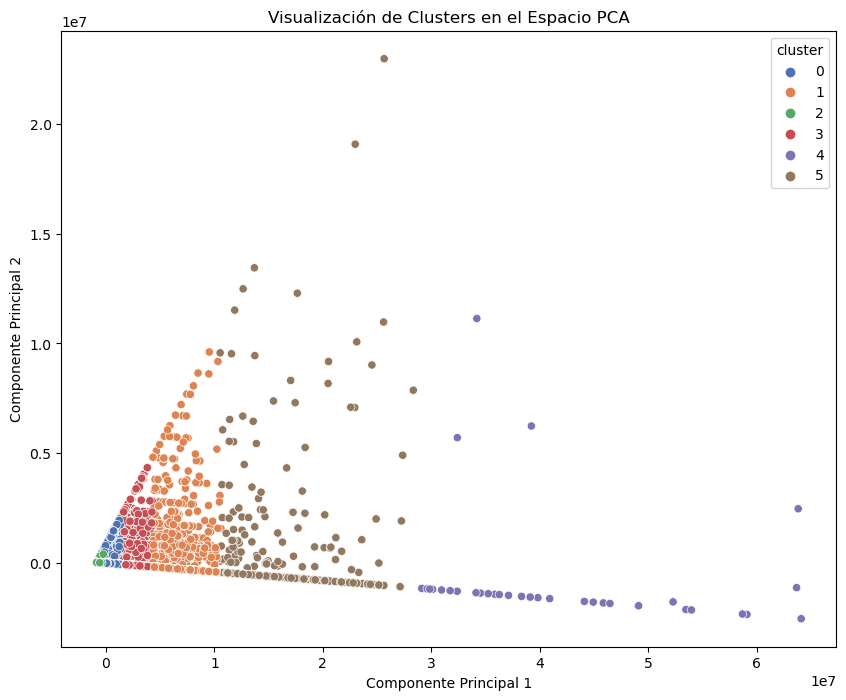

In [35]:
num_clusters = 6

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=10101, n_init=10)
kmeans.fit_predict(df_pca)

df_pca['cluster'] = kmeans.labels_

# Visualizar los clusters formados
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='deep')
plt.title('Visualización de Clusters en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [37]:
# Agrupando por la columna 'cluster' y calculando estadísticas de 'ingreso_total_observado'
cluster_stats = df_pca.groupby('cluster')['PC1'].describe()
cluster_stats


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,61409.0,3.803998e+05,3.790009e+05,-1.737276e+05,1.396890e+05,3.062256e+05,5.979978e+05,1.426072e+06
1,2903.0,6.207472e+06,1.532874e+06,4.330110e+06,4.969251e+06,5.833419e+06,7.134227e+06,1.065346e+07
2,109664.0,-7.281662e+05,1.970552e+05,-8.595307e+05,-8.595307e+05,-8.595307e+05,-6.347063e+05,-1.636440e+05
3,12055.0,2.455624e+06,7.842166e+05,1.421355e+06,1.794955e+06,2.252006e+06,3.045587e+06,4.339743e+06
4,40.0,4.135230e+07,1.069016e+07,2.911706e+07,3.238869e+07,3.910926e+07,4.910146e+07,6.408975e+07
5,479.0,1.506623e+07,4.039721e+06,1.052685e+07,1.190345e+07,1.375905e+07,1.728085e+07,2.833242e+07


In [39]:
cluster_stats_scaled = cluster_stats / 1_000_000

cluster_stats_scaled

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,0.061409,0.380400,0.379001,-0.173728,0.139689,0.306226,0.597998,1.426072
1,0.002903,6.207472,1.532874,4.330110,4.969251,5.833419,7.134227,10.653465
2,0.109664,-0.728166,0.197055,-0.859531,-0.859531,-0.859531,-0.634706,-0.163644
3,0.012055,2.455624,0.784217,1.421355,1.794955,2.252006,3.045587,4.339743
4,0.000040,41.352304,10.690164,29.117061,32.388690,39.109258,49.101455,64.089751
5,0.000479,15.066231,4.039721,10.526848,11.903449,13.759054,17.280846,28.332417


In [40]:
cluster_stats_sorted = cluster_stats_scaled.sort_values(by='mean', ascending=False)

cluster_stats_sorted

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
4,0.000040,41.352304,10.690164,29.117061,32.388690,39.109258,49.101455,64.089751
5,0.000479,15.066231,4.039721,10.526848,11.903449,13.759054,17.280846,28.332417
1,0.002903,6.207472,1.532874,4.330110,4.969251,5.833419,7.134227,10.653465
3,0.012055,2.455624,0.784217,1.421355,1.794955,2.252006,3.045587,4.339743
0,0.061409,0.380400,0.379001,-0.173728,0.139689,0.306226,0.597998,1.426072
2,0.109664,-0.728166,0.197055,-0.859531,-0.859531,-0.859531,-0.634706,-0.163644


De esta forma podemos observar los grupos sociales formados:
    
1. La clase alta, formada por las personas que ganan 2'9M en adelante
2. La clase media alta, formada por las personas que ganan entre 1M y 2'8M
3. La clase media, formada por las personas que ganan de 400K a 1M
4. La clase baja, formada por las personas que ganan desde 140K a 400K
5. La clase en pobreza, formada por las personas que ganan menos de 140K
6. La clase en pobreza extrema que ganan menos de 85.000

Se observa que entre más clusters se formen, más se fragmenta la clase baja, pero no separa de la clase media hacia arriba. Lo que puede mostrarnos que para describir la realidad de Colombia hace falta dividir más a las personas en sus clases más bajas que en las más altas. 

Cabe resaltar que este fue un ejercicio realizado con una muestra de 186550 en un país de más de 18 millones de hogares para el año 2023. Por lo tanto, es insuficiente la muestra para realizar un análisis final.

Como aprendizaje de este proyecto para las personas promotoras de políticas públicas se sabe que se debe llegar a políticas más inclusivas que excluyentes. La clase baja contiene a la mayor parte de la población y dentro de ella se tienen varios matizes para caracterizar su nivel de vida. Por lo tanto, se deben generar ayudas y programas que se enfoquen en aumentar los ingresos de los hogares, puesto que esto si hace parte de lo que clasifica finalmente a una persona en un estrato social. 

Estas políticas pueden ser de educación, emprendimiento o trabajo. Más que subsidios y ayudas, se requiere formar a personas que puedan ganar más dinero y así mejorar la calidad de vida de sus familias.